In [33]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
dataset = "IMDB"
ratios = ["100-0", "75-25", "50-50", "25-75", "0-100"]
n_folds = 20
# n_runs = 1

exp_dir = Path(f"../../results/results_{dataset.lower()}")

In [35]:
results_m = []
for ratio in ratios:
    for fold in range(1, n_folds+1):
        mae_m = np.load(exp_dir / f"{ratio}/fold_{fold}/mae_male.npy")
        results_m.append({"ratio": ratio, "fold": fold, "mae": mae_m})
df_m = pd.DataFrame(results_m)
df_m["a"] = 0

results_f = []
for ratio in ratios:
    for fold in range(1, n_folds+1):
        mae_f = np.load(exp_dir / f"{ratio}/fold_{fold}/mae_female.npy")
        results_f.append({"ratio": ratio, "fold": fold, "mae": mae_f})
df_f = pd.DataFrame(results_f)
df_f["a"] = 1

df_all = pd.concat([df_m, df_f])

In [36]:
df_grouped = df_all.groupby(["ratio", "fold", "a"])["mae"].mean().reset_index()
df_grouped["a"] = df_grouped["a"].map({0: "Male", 1: "Female"}) 

In [37]:
df_ratios = df_grouped.groupby(["ratio", "a"])["mae"].agg(["mean", "std"]).reset_index()
df_ratios_m = df_ratios[df_ratios["a"] == "Male"].reset_index().iloc[[1, 4, 3, 2, 0], :]
df_ratios_f = df_ratios[df_ratios["a"] == "Female"].reset_index().iloc[[1, 4, 3, 2, 0], :]

print(df_ratios_m.round(3))
print(df_ratios_f.round(3))

   index  ratio     a      mean    std
1      3  100-0  Male  6.801583  0.079
4      9  75-25  Male  7.006356  0.072
3      7  50-50  Male  7.185943  0.082
2      5  25-75  Male  7.483693  0.091
0      1  0-100  Male  9.096165  0.143
   index  ratio       a      mean    std
1      2  100-0  Female   8.75214  0.113
4      8  75-25  Female  7.287392  0.068
3      6  50-50  Female  7.031183  0.059
2      4  25-75  Female  6.899098  0.079
0      0  0-100  Female  6.676654  0.075


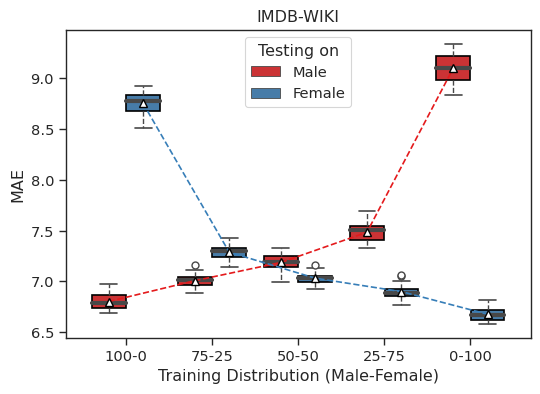

In [38]:
sns.set_theme(style="ticks")
sns.set_context("paper", font_scale=1.2)
palette_name = "Set1" 

flierprops = dict(marker="o", markerfacecolor="white")
meanprops = dict(markerfacecolor="blue", markeredgecolor="blue")
medianprops = dict(linewidth=3)
boxprops = dict(edgecolor="black")
whiskerprops = dict(linestyle="--", linewidth=1)
plot_params = {"showmeans": False, "flierprops": flierprops, "whiskerprops": whiskerprops, "boxprops": boxprops, "meanprops": meanprops, "medianprops": medianprops, "palette": palette_name}

plt.figure(figsize=(6, 4))

ax = sns.boxplot(data=df_grouped, x="ratio", y="mae", hue="a", order=ratios, zorder=1, **plot_params)

# plt.gca().yaxis.set_major_formatter('{:.1f}'.format)

plt.xlabel("Training Distribution (Male-Female)")
plt.ylabel("MAE")
plt.title(f"{dataset}-WIKI")
plt.legend(title="Testing on", loc="upper center")#, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

if dataset == "UTKFace":
    plt.ylim(5, 10)

means = df_grouped.groupby(["a", "ratio"])["mae"].mean().reset_index()
means_f = means.iloc[[1, 4, 3, 2, 0], :]
means_m = means.iloc[[6, 9, 8, 7, 5], :]

hue_colors = sns.color_palette(palette_name, n_colors=len(df_grouped['a'].unique()))
for i, hue_value in enumerate([means_m, means_f]):
    if i == 0: # Male
        plt.plot(np.arange(5)-0.2, means_m["mae"], color=hue_colors[i % len(hue_colors)], marker="^", linestyle='--', linewidth=1.2, markersize=6, markeredgecolor="black", markerfacecolor="white")
    else:
        plt.plot(np.arange(5)+0.2, means_f["mae"], color=hue_colors[i % len(hue_colors)], marker="^", linestyle='--', linewidth=1.2, markersize=6, markeredgecolor="black", markerfacecolor="white")

plt.savefig(f"../../results/results_{dataset.lower()}/mae_ratios_{dataset}.png", dpi=300, bbox_inches="tight")
plt.show()